In [19]:
import numpy as np
import pandas as pd

In [21]:
df=pd.read_csv("maternalHealth.csv")

In [22]:
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1205 non-null   int64  
 1   Systolic BP             1200 non-null   float64
 2   Diastolic               1201 non-null   float64
 3   BS                      1203 non-null   float64
 4   Body Temp               1205 non-null   int64  
 5   BMI                     1187 non-null   float64
 6   Previous Complications  1203 non-null   float64
 7   Preexisting Diabetes    1203 non-null   float64
 8   Gestational Diabetes    1205 non-null   int64  
 9   Mental Health           1205 non-null   int64  
 10  Heart Rate              1203 non-null   float64
 11  Risk Level              1187 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 113.1+ KB


In [24]:
df.isnull().sum()

Age                        0
Systolic BP                5
Diastolic                  4
BS                         2
Body Temp                  0
BMI                       18
Previous Complications     2
Preexisting Diabetes       2
Gestational Diabetes       0
Mental Health              0
Heart Rate                 2
Risk Level                18
dtype: int64

In [26]:
df=df.dropna()

In [27]:
df.isnull().sum().sum()

np.int64(0)

In [29]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["Risk Level"]=le.fit_transform(df["Risk Level"])

/var/folders/9w/xrntbp0155s19pxs2mtd1pzw0000gn/T/ipykernel_68514/335981030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Risk Level"]=le.fit_transform(df["Risk Level"])


In [30]:
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,0
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,1
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,1
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,1
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,1


In [31]:
from sklearn.model_selection import train_test_split

y=df["Risk Level"]
x=df.drop(["Risk Level"],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=31)

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    SVR(),
    MLPRegressor(max_iter=1000)
]
scoreResults=[]
def evaluateModels():
    for x in models:
        model=x
        model.fit(x_train,y_train)
        name=x.__class__.__name__
        score=model.score(x_test,y_test)
        print(name,score)
        scoreResults.append((name,score))


In [65]:
evaluateModels()

LinearRegression 0.8233018574150217
Ridge 0.8235361690518459
Lasso 0.19201924154518069
ElasticNet 0.3240467152929235
DecisionTreeRegressor 0.8019900828646545
RandomForestRegressor 0.9466095377550001
GradientBoostingRegressor 0.9402442364874747
KNeighborsRegressor 0.6803886984591834
SVR 0.5331012489766384
MLPRegressor 0.7844550901698505


/var/folders/9w/xrntbp0155s19pxs2mtd1pzw0000gn/T/ipykernel_68514/169979116.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values("R2_Score", ascending=False),


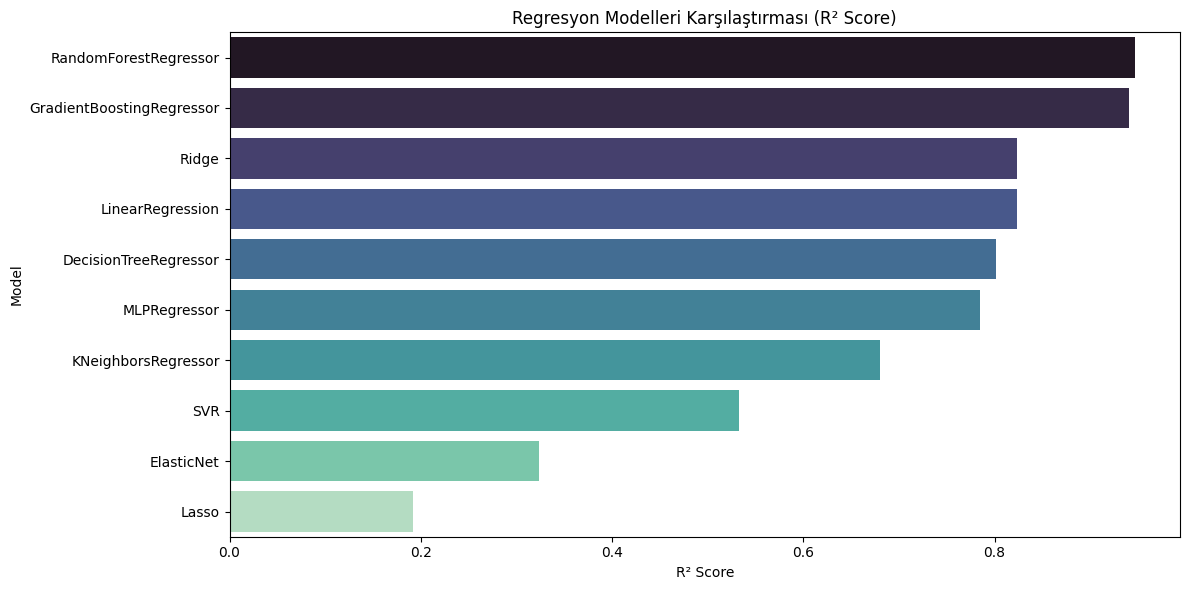

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sonuçları DataFrame'e çevir
results_df = pd.DataFrame(scoreResults, columns=["Model", "R2_Score"])

# Barplot çiz
plt.figure(figsize=(12,6))
sns.barplot(data=results_df.sort_values("R2_Score", ascending=False),
            x="R2_Score", y="Model", palette="mako")
plt.title("Regresyon Modelleri Karşılaştırması (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()